reference: https://medium.com/analytics-vidhya/how-to-pick-the-optimal-image-size-for-training-convolution-neural-network-65702b880f05

In [1]:
# import library
import os
import pickle

# Import Packages
import pandas as pd
import matplotlib.pyplot  as plt
import matplotlib.cm as cm
from PIL import Image
from pathlib import Path
import imagesize
import numpy as np

In [2]:
positive_images_path = '../data_v/data/1000-sample/1/'
negative_images_path = '../data_v/data/1000-sample/0/'
merge_image_path = '../data_v/data/1000-sample/merge/'
ext = ['png']

In [3]:
# Get the Image Resolutions
imgs = [img.name for img in Path(merge_image_path).iterdir() if img.suffix == ".png"]
img_meta = {}
for f in imgs: img_meta[str(f)] = imagesize.get(merge_image_path+f)
    
# Convert it to Dataframe and compute aspect ratio
img_meta_df = pd.DataFrame.from_dict([img_meta]).T.reset_index().set_axis(['FileName', 'Size'], axis='columns', copy=False)
img_meta_df[["Width", "Height"]] = pd.DataFrame(img_meta_df["Size"].tolist(), index=img_meta_df.index)
img_meta_df["Aspect Ratio"] = round(img_meta_df["Width"] / img_meta_df["Height"], 2)

print(f'Total Nr of Images in the POSITIVE dataset: {len(img_meta_df)}')
img_meta_df.sample(10)

Total Nr of Images in the POSITIVE dataset: 3421


,FileName,Size,Width,Height,Aspect Ratio
2562,progresspics-17qm2l9.png,"(216, 162)",216,162,1.33
2848,ratemycock-17w6xjg.png,"(604, 806)",604,806,0.75
2585,ratemycock-17irmql.png,"(248, 441)",248,441,0.56
3052,softies-17ih2fc.png,"(463, 617)",463,617,0.75
2432,penis-17v3f7q.png,"(712, 712)",712,712,1.00
2162,penis-17imc6x.png,"(604, 806)",604,806,0.75
2056,nattyorjuice-17femfl.png,"(463, 617)",463,617,0.75
74,aviation-17qy1yt.png,"(160, 160)",160,160,1.00
505,carporn-17980rs.png,"(288, 359)",288,359,0.80
1083,foreskin-17ruevl.png,"(121, 215)",121,215,0.56


(0.0, 900.0)

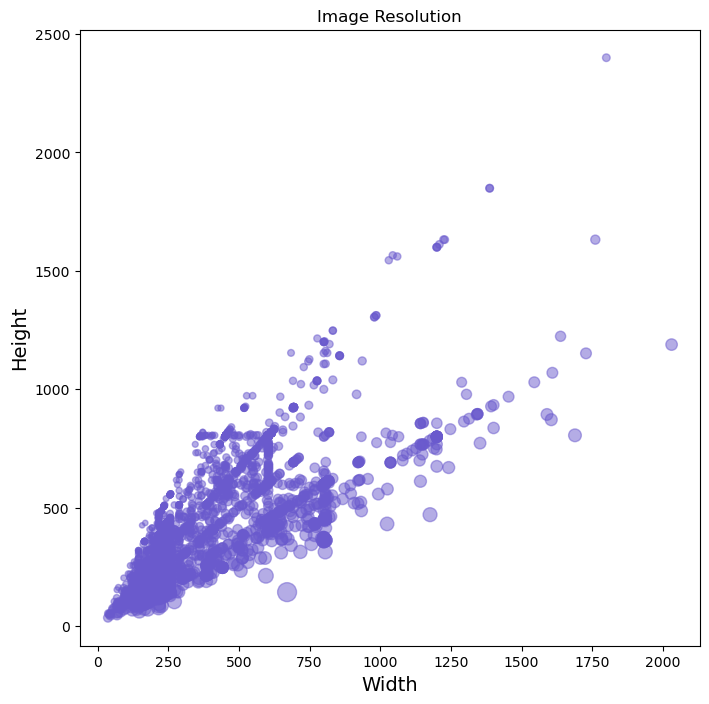

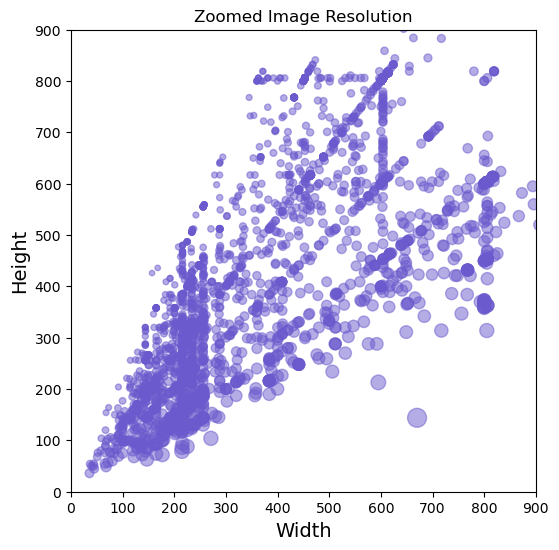

In [4]:
# Visualize Image Resolutions

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
points = ax.scatter(img_meta_df.Width, img_meta_df.Height, color='slateblue', alpha=0.5, 
                    s=img_meta_df["Aspect Ratio"]*40, picker=True)
ax.set_title("Image Resolution")
ax.set_xlabel("Width", size=14)
ax.set_ylabel("Height", size=14)

#plt.xlim(0, 1000) 
#plt.ylim(0, 1000) 

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)
points = ax.scatter(img_meta_df.Width, img_meta_df.Height, color='slateblue', alpha=0.5, 
                    s=img_meta_df["Aspect Ratio"]*40, picker=True)
ax.set_title("Zoomed Image Resolution")
ax.set_xlabel("Width", size=14)
ax.set_ylabel("Height", size=14)
plt.xlim(0, 900) 
plt.ylim(0, 900) 